In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data Cleaning**

In [11]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
#let's check for null values
print('\nNull values in train data:')
print(train_df.isnull().sum())
print('\nNull values in test data:')
print(test_df.isnull().sum())


Null values in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Null values in test data:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [16]:
import warnings
warnings.filterwarnings("ignore")

#handlin missing values
def process_missing_values(df):

    df_copy = df.copy()
    categorical_columns = df_copy.select_dtypes(include=['object']).columns
    numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

    for col in categorical_columns:
        df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)

    for col in numerical_columns:
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    
    return df_copy

processed_train_df = process_missing_values(train_df)
processed_test_df = process_missing_values(test_df)


In [18]:
print('\nNull values in train data:')
print(processed_train_df.isnull().sum())
print('\nNull values in test data:')
print(processed_test_df.isnull().sum())


Null values in train data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Null values in test data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


## Data Visualization

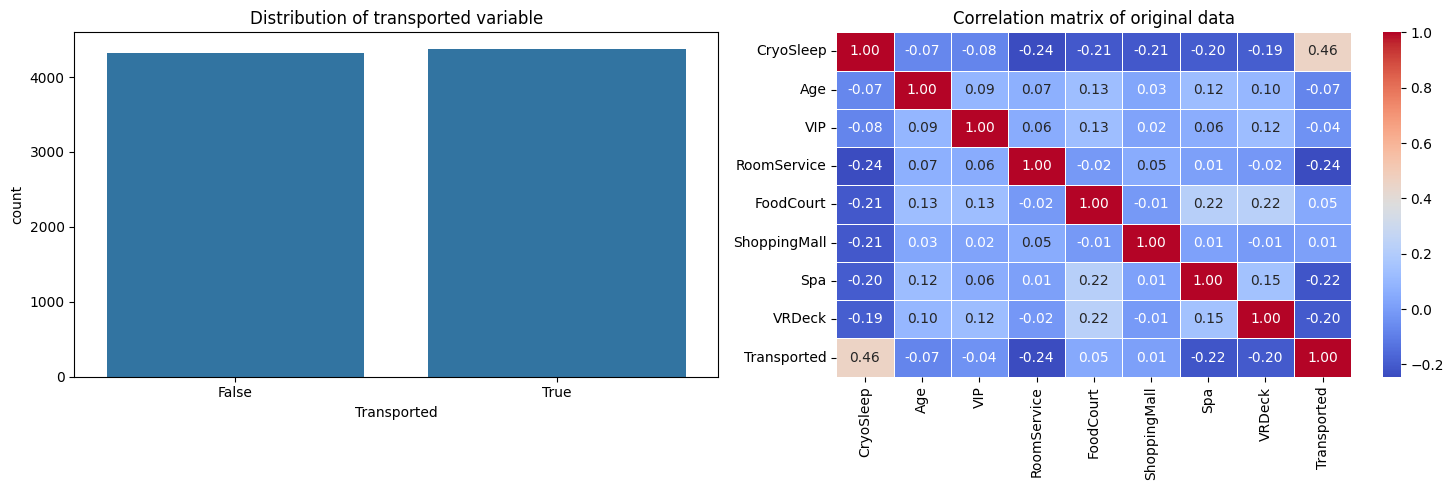

In [37]:
# Distribution of target variable

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=processed_train_df, x='Transported', ax=ax[0])
ax[0].set_title('Distribution of transported variable')
corr = processed_train_df[processed_train_df.dtypes[processed_train_df.dtypes != 'object'].index].corr()
sns.heatmap(corr, annot=True, ax=ax[1], cmap='coolwarm', fmt=".2f", linewidths=0.5)
ax[1].set_title('Correlation matrix of original data')
plt.tight_layout()
plt.show()



In [59]:
correlations = processed_train_df[processed_train_df.dtypes[processed_train_df.dtypes != 'object'].index].corr()['Transported'].sort_values(ascending=False)
print(correlations)

Transported     1.000000
CryoSleep       0.460132
FoodCourt       0.046074
ShoppingMall    0.010019
VIP            -0.037261
Age            -0.074249
VRDeck         -0.204825
Spa            -0.218791
RoomService    -0.242048
Name: Transported, dtype: float64


In [66]:
class FeatureVisualizer:
    def __init__(self, data):
        self.data = data
        self.fig_size = (15, 10)
        
    def plot_numerical_feature(self, feature):
        """Plot distribution of numerical features by target class in both normal and log scale"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=self.fig_size)
        
        # Normal scale plots
        # Histogram
        sns.histplot(data=self.data, x=feature, hue='Transported', ax=ax1)
        ax1.set_title(f'Distribution of {feature} by Transport Status')
        
        # Boxplot
        sns.boxplot(data=self.data, y=feature, x='Transported', ax=ax2)
        ax2.set_title(f'Boxplot of {feature} by Transport Status')
        
        # Log transformed plots
        # Histogram
        sns.histplot(data=self.data, x=np.log1p(self.data[feature]), hue='Transported', ax=ax3)
        ax3.set_title(f'Log Distribution of {feature} by Transport Status')
        
        # Boxplot
        sns.boxplot(data=self.data, y=np.log1p(self.data[feature]), x='Transported', ax=ax4)
        ax4.set_title(f'Log Boxplot of {feature} by Transport Status')
        
        plt.tight_layout()
        plt.show()
        
    def plot_categorical_feature(self, feature):
        """Plot distribution of categorical features by target class"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Count plot
        sns.countplot(data=self.data, x=feature, hue='Transported', ax=ax1)
        ax1.set_title(f'Distribution of {feature} by Transport Status')
        ax1.tick_params(axis='x', rotation=45)
        
        # Percentage stacked bar
        prop_data = (self.data
                    .groupby(feature)['Transported']
                    .value_counts(normalize=True)
                    .unstack())
        prop_data.plot(kind='bar', stacked=True, ax=ax2)
        ax2.set_title(f'Proportion of Transport Status by {feature}')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

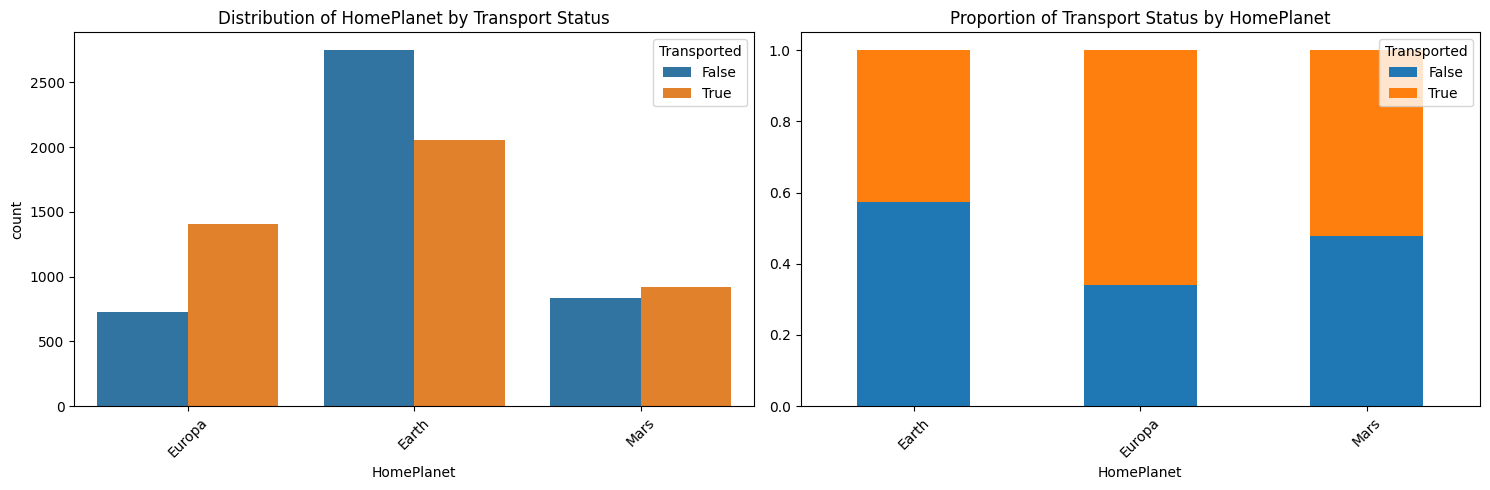

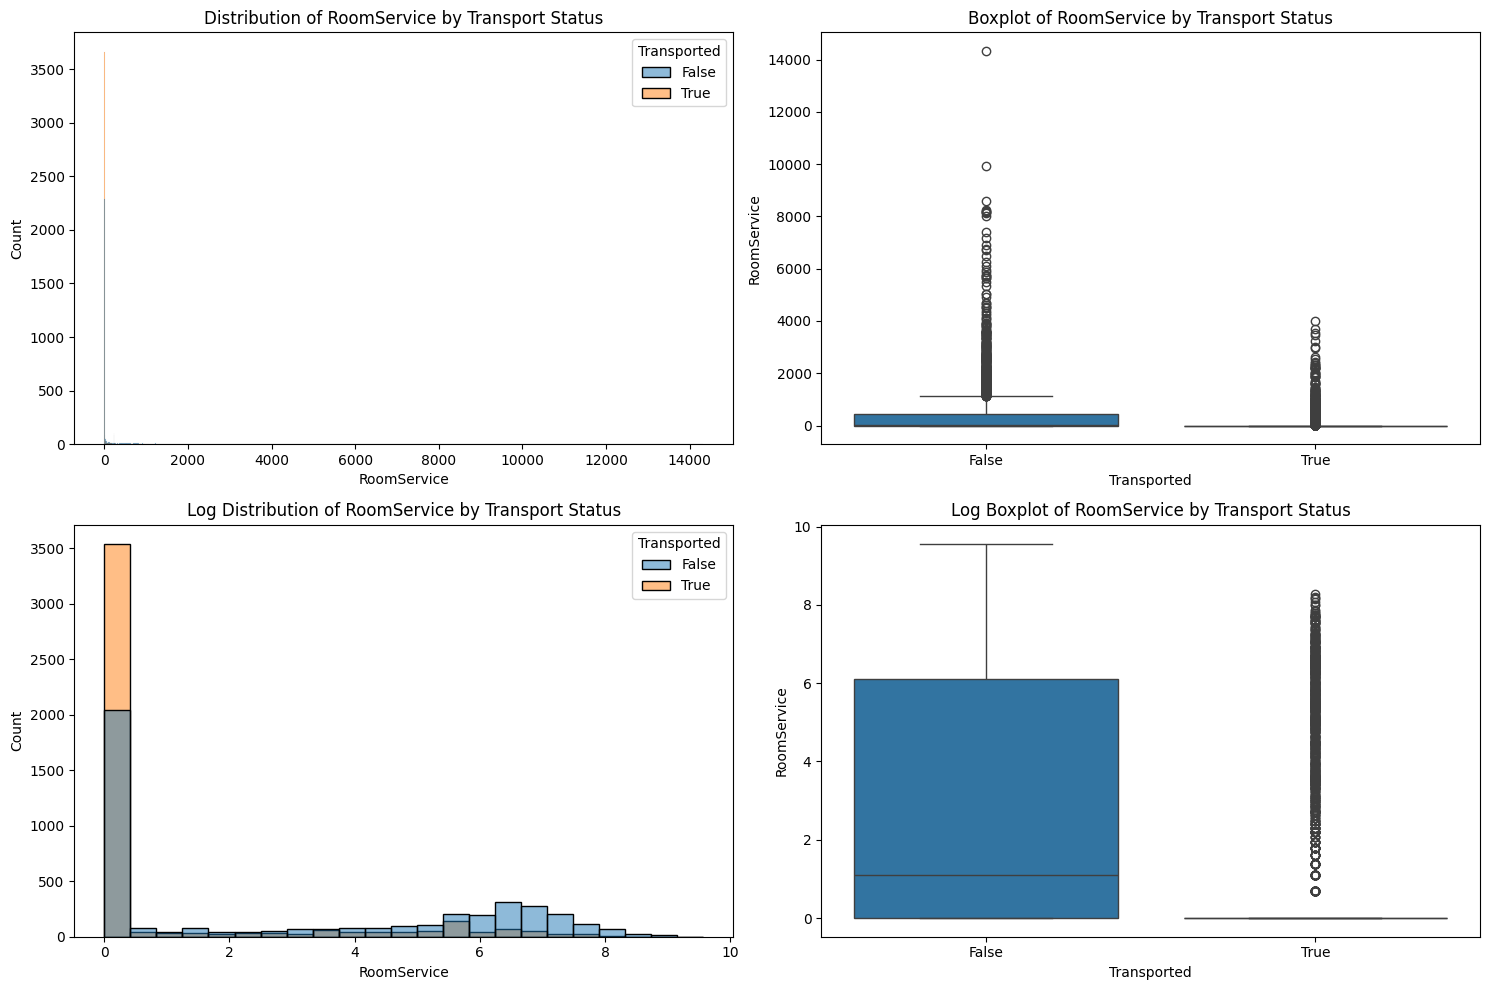

In [75]:
visualizer = FeatureVisualizer(processed_train_df)
visualizer.plot_categorical_feature('HomePlanet')
visualizer.plot_numerical_feature('RoomService')

Age

+ Age between 0 and 18 is more likely to be transported so we can engineer this feature by creating two bins one for minors and another for adults

CryoSleep

+ CryoSleep true is more likely to be transported

FoodCourt       

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

ShoppingMall

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

VRDeck

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

Spa

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

RoomService

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

Let's split name columns into Lastname and Firstname so that we can try to see if theres any relation for LastName with other features

In [5]:

train_df[['FirstName', 'LastName']] = train_df['Name'].str.split(n=1, expand=True)
test_df[['FirstName', 'LastName']] = test_df['Name'].str.split(n=1, expand=True)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines


In [5]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
FirstName       200
LastName        200
dtype: int64

In [6]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
FirstName        94
LastName         94
dtype: int64

In [7]:
for column in train_df.columns:
    missing_count = train_df[column].isnull().sum()
    if missing_count > 0:
        percentaje = missing_count / len(train_df) * 100
        print(f'Percentage of missing values in {column} is {percentaje:.2f}% ')

Percentage of missing values in HomePlanet is 2.31% 
Percentage of missing values in CryoSleep is 2.50% 
Percentage of missing values in Cabin is 2.29% 
Percentage of missing values in Destination is 2.09% 
Percentage of missing values in Age is 2.06% 
Percentage of missing values in VIP is 2.34% 
Percentage of missing values in RoomService is 2.08% 
Percentage of missing values in FoodCourt is 2.11% 
Percentage of missing values in ShoppingMall is 2.39% 
Percentage of missing values in Spa is 2.11% 
Percentage of missing values in VRDeck is 2.16% 
Percentage of missing values in Name is 2.30% 
Percentage of missing values in FirstName is 2.30% 
Percentage of missing values in LastName is 2.30% 


## 2. Handling missing Values

### 2.1 Categorical Variables

In [8]:
train_cats = train_df.select_dtypes(include ='object')
train_cats.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'FirstName', 'LastName'],
      dtype='object')

In [9]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
FirstName        94
LastName         94
dtype: int64

Lets split the Cabin feature so that we can analyze if there's any relation in the asignation of cabin

In [10]:
train_df[['Deck', 'Number', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'Number', 'Side']] = test_df['Cabin'].str.split('/', expand=True)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FirstName,LastName,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre,E,608,S


In [11]:
print("Deck únicos:", train_df['Deck'].unique())
print("Number únicos:", train_df['Number'].unique())
print("Side únicos:", train_df['Side'].unique())

Deck únicos: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Number únicos: ['0' '1' '2' ... '1892' '1893' '1894']
Side únicos: ['P' 'S' nan]


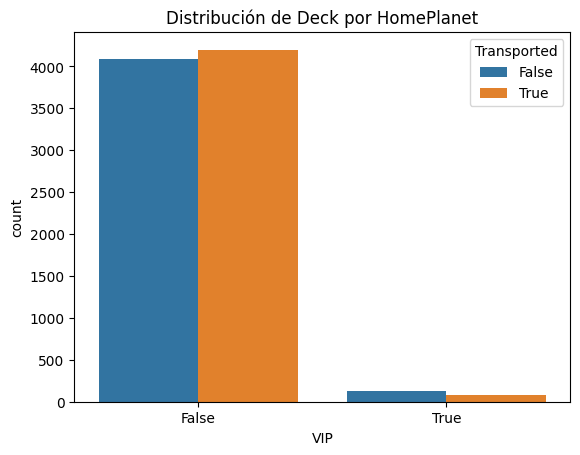

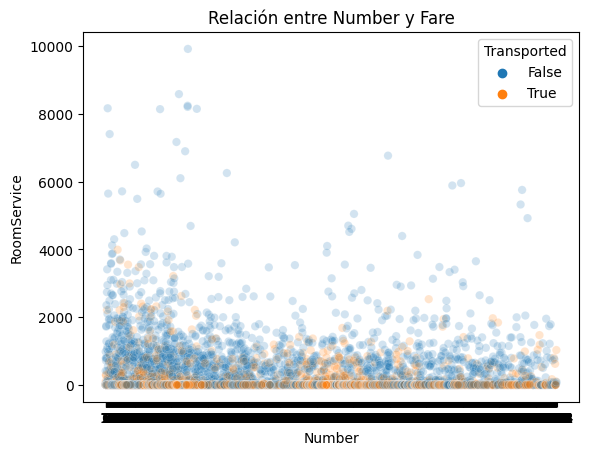

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable "Deck" frente a "HomePlanet"
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.title("Distribución de Deck por HomePlanet")
plt.show()

# Relación de 'Number' con 'Fare' (ejemplo)
sns.scatterplot(data=train_df, x='Number', y='RoomService', hue='Transported', alpha=0.2)
plt.title("Relación entre Number y Fare")
plt.show()

#### 2.1.1 HomePlanet <br>
First null values are filled out with Moda acording to LastName field, then the ramaining values are filled with europe where cabim number is between 0 and 250 and the remainng ones with the mode
 

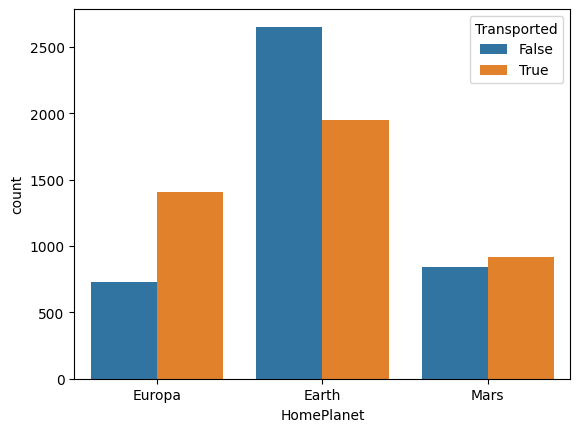

In [13]:
fig = plt.figure()
sns.countplot(x='HomePlanet', hue='Transported', data=train_df)
plt.show()

In [14]:
# familia = train_df[train_df.duplicated(subset='LastName', keep=False)]
# familia = familia.sort_values(by='LastName')
# familia.group
origen_lastname = train_df.groupby('LastName')['HomePlanet'].unique().reset_index()
multiples_planetas = origen_lastname[origen_lastname['HomePlanet'].apply(len) > 1]
multiples_planetas

for index, row in multiples_planetas.iterrows():
    if len(row['HomePlanet']) > 2:
        print('Más de dos planetas')
print('Every last name pertain to only one planet')

Every last name pertain to only one planet


We have that every LastName partain to only one HomePlanet, so we will fill null values in HomePlanet  using the LastName

In [15]:
map_planet = train_df.groupby('LastName')['HomePlanet'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
map_planet_test = test_df.groupby('LastName')['HomePlanet'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict()
train_df['HomePlanet'] = train_df.apply(lambda row: map_planet.get(row['LastName'], row['HomePlanet']) if pd.notnull(row['LastName']) and pd.isnull(row['HomePlanet']) else row['HomePlanet'], axis=1)
test_df['HomePlanet'] = test_df.apply(lambda row: map_planet.get(row['LastName'], row['HomePlanet']) if pd.notnull(row['LastName']) and pd.isnull(row['HomePlanet']) else row['HomePlanet'], axis=1)
train_df.isnull().sum()

PassengerId       0
HomePlanet       15
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
FirstName       200
LastName        200
Deck            199
Number          199
Side            199
dtype: int64

In [16]:
train_df['Number'] = pd.to_numeric(test_df['Number'], errors='coerce')
train_df['HomePlanet'] = train_df.apply(lambda row: 'Europa' if pd.isnull(row['HomePlanet']) and 0 <= row['Number'] <= 250 else row['HomePlanet'], axis=1)
train_df['HomePlanet'] = train_df.apply(lambda row: 'Earth' if pd.isnull(row['HomePlanet']) else row['HomePlanet'], axis=1)
test_df['Number'] = pd.to_numeric(test_df['Number'], errors='coerce')
test_df['HomePlanet'] = test_df.apply(lambda row: 'Europa' if pd.isnull(row['HomePlanet']) and 0 <= row['Number'] <= 250 else row['HomePlanet'], axis=1)
test_df['HomePlanet'] = test_df.apply(lambda row: 'Earth' if pd.isnull(row['HomePlanet']) else row['HomePlanet'], axis=1)


2.1.2 CryoSleep

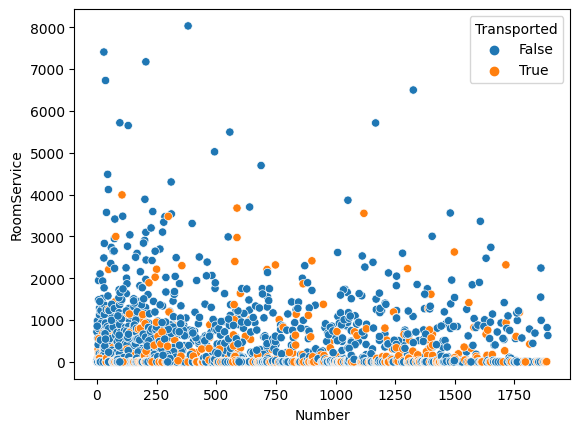

In [17]:
fig = plt.figure()
despiertos = train_df[train_df['CryoSleep'] == False]
sns.scatterplot(x='Number', y='RoomService', data=despiertos, hue='Transported')
plt.show()

In [18]:
train_df['CryoSleep'].isnull().sum()

217

In [19]:
train_df['CryoSleep'] = train_df.apply(
    lambda row: False if pd.isnull(row['CryoSleep']) and (row['RoomService'] > 0 or row['Spa'] > 0 or row['FoodCourt'] > 0 or row['ShoppingMall'] > 0 or row['VRDeck'] > 0) 
    else True, axis=1)
test_df['CryoSleep'] = test_df.apply(
    lambda row: False if pd.isnull(row['CryoSleep']) and (row['RoomService'] > 0 or row['Spa'] > 0 or row['FoodCourt'] > 0 or row['ShoppingMall'] > 0 or row['VRDeck'] > 0) 
    else True, axis=1)

In [20]:
train_df['CryoSleep'].isnull().sum()

0

For CryoSleep we handdle nulls values for those who made any expenditure on services we set False and the remaining one to True

#### 2.2.3 Cabin

In [21]:
n_nulls = train_df['Side'].isnull().sum()
values_to_fill = ['P', 'S'] *(n_nulls // 2)
if n_nulls % 2 != 0:
    values_to_fill.append('P')
train_df['Side'] = train_df['Side'].apply(lambda x: np.random.choice(values_to_fill) if pd.isnull(x) else x)
train_df['Side'].isnull().sum()

n_nulls_test = test_df['Side'].isnull().sum()
values_to_fill_test = ['P', 'S'] *(n_nulls_test // 2)
if n_nulls_test % 2 != 0:
    values_to_fill_test.append('P')
test_df['Side'] = test_df['Side'].apply(lambda x: np.random.choice(values_to_fill_test) if pd.isnull(x) else x)
test_df['Side'].isnull().sum()

0

In [22]:
n_nulls = train_df['Deck'].isnull().sum()
values_to_fill = ['F', 'G'] *(n_nulls // 2)
if n_nulls % 2 != 0:
    values_to_fill.append('F')
train_df['Deck'] = train_df['Deck'].apply(lambda x: np.random.choice(values_to_fill) if pd.isnull(x) else x)
train_df['Deck'].isnull().sum()

n_nulls_test = test_df['Deck'].isnull().sum()
values_to_fill_test = ['F', 'G'] *(n_nulls_test // 2)
if n_nulls_test % 2 != 0:
    values_to_fill_test.append('F')
test_df['Deck'] = test_df['Deck'].apply(lambda x: np.random.choice(values_to_fill_test) if pd.isnull(x) else x)
test_df['Deck'].isnull().sum()

0

In [23]:
# Verificar cuántos valores nulos hay en 'Number'
missing_values = train_df['Number'].isnull().sum()

# Obtener las combinaciones existentes de Deck y Side
existing_combinations = train_df.dropna(subset=['Number'])[['Deck', 'Side']].drop_duplicates()

# Generar suficientes nuevos valores para 'Number'
new_numbers = []

# Generar números únicos para cada combinación de 'Deck' y 'Side'
for idx, row in existing_combinations.iterrows():
    deck = row['Deck']
    side = row['Side']
    # Generar un número único para cada combinación de 'Deck' y 'Side'
    for _ in range(missing_values // len(existing_combinations) + 1):
        new_numbers.append(f"{deck}_{side}_{np.random.randint(1000, 9999)}")

# Llenar los valores nulos de 'Number' con los nuevos valores generados
train_df['Number'] = train_df.apply(
    lambda row: new_numbers.pop() if pd.isnull(row['Number']) else row['Number'], axis=1)

# Verificar que no haya valores nulos en 'Number'
train_df['Number'].isnull().sum()



0

In [24]:
# Verificar cuántos valores nulos hay en 'Number'
missing_values = test_df['Number'].isnull().sum()

# Obtener las combinaciones existentes de Deck y Side
existing_combinations = test_df.dropna(subset=['Number'])[['Deck', 'Side']].drop_duplicates()

# Generar suficientes nuevos valores para 'Number'
new_numbers = []

# Generar números únicos para cada combinación de 'Deck' y 'Side'
for idx, row in existing_combinations.iterrows():
    deck = row['Deck']
    side = row['Side']
    # Generar un número único para cada combinación de 'Deck' y 'Side'
    for _ in range(missing_values // len(existing_combinations) + 1):
        new_numbers.append(f"{deck}_{side}_{np.random.randint(1000, 9999)}")

# Llenar los valores nulos de 'Number' con los nuevos valores generados
test_df['Number'] = test_df.apply(
    lambda row: new_numbers.pop() if pd.isnull(row['Number']) else row['Number'], axis=1)

# Verificar que no haya valores nulos en 'Number'
test_df['Number'].isnull().sum()

0

#### 2.2.4 Destination

Replace for Mode

In [25]:
train_df['Destination'] = train_df.apply(lambda row: 'TRAPPIST-1e' if pd.isnull(row['Destination']) else row['Destination'], axis=1) 
test_df['Destination'] = test_df.apply(lambda row: 'TRAPPIST-1e' if pd.isnull(row['Destination']) else row['Destination'], axis=1) 

#### 2.2.5 Vip

Replace for the mode

In [26]:
train_df['VIP'].replace(np.nan, False, inplace=True)
test_df['VIP'].replace(np.nan, False, inplace=True)

<ipython-input-26-171c8be906ad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['VIP'].replace(np.nan, False, inplace=True)
<ipython-input-26-171c8be906ad>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['VIP'].replace(np.nan, False, inplace=True)
<ipython-input-26-171c8be906ad>:

In [27]:
# train_df.drop(columns = 'Cabin', inplace= True)
test_df.drop(columns = 'Cabin', inplace= True)

train_df.count()

PassengerId     8693
HomePlanet      8693
CryoSleep       8693
Cabin           8494
Destination     8693
Age             8514
VIP             8693
RoomService     8512
FoodCourt       8510
ShoppingMall    8485
Spa             8510
VRDeck          8505
Name            8493
Transported     8693
FirstName       8493
LastName        8493
Deck            8693
Number          8693
Side            8693
dtype: int64

### 2.2 Numerical Variables


In [28]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [29]:
train_df.select_dtypes(include='number').columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [30]:
train_num = train_df.select_dtypes(include='number')
np.log1p(train_num).describe().T

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,count,mean,std,min,25%,50%,75%,max
Age,8514.0,3.211263,0.749847,0.0,2.995732,3.332205,3.663562,4.382027
RoomService,8512.0,1.772195,2.736122,0.0,0.000000,0.000000,3.871201,9.569971
FoodCourt,8510.0,1.947541,2.950822,0.0,0.000000,0.000000,4.343805,10.302733
ShoppingMall,8485.0,1.638622,2.586336,0.0,0.000000,0.000000,3.332205,10.064458
Spa,8510.0,1.878394,2.785687,0.0,0.000000,0.000000,4.094345,10.017218
VRDeck,8505.0,1.796809,2.764405,0.0,0.000000,0.000000,3.850148,10.091377


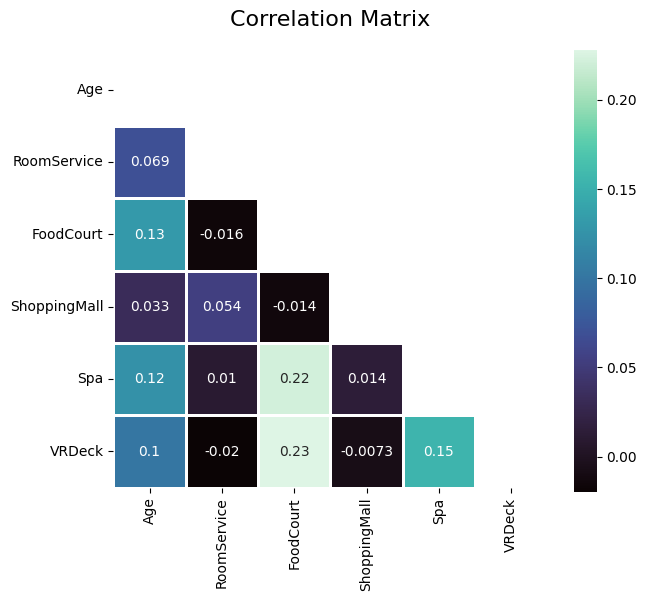

In [31]:
corr = train_num.corr()
triu_mask = np.triu(corr)
plt.figure(figsize=(7, 7))
sns.heatmap(
    corr,
    square=True,
    linewidths=2,
    annot=True,
    mask=triu_mask,
    cbar_kws={'shrink': 0.82},
    cmap='mako',
)
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.show()

Theres no correlation between variables, so let's try filling out with mean all numerical values

In [32]:
for column in train_num.columns:
    train_df[column].fillna(train_df[column].mean(), inplace=True)

<ipython-input-32-875b43bf72f7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mean(), inplace=True)


In [33]:
for column in train_num.columns:
    test_df[column].fillna(test_df[column].mean(), inplace=True)

<ipython-input-33-9a0a3b089371>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[column].fillna(test_df[column].mean(), inplace=True)


In [34]:
test_df.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
FirstName       94
LastName        94
Deck             0
Number           0
Side             0
dtype: int64

In [35]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FirstName,LastName,Deck,Number,Side
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy,B,3.0,P
1,0002_01,Earth,True,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines,F,4.0,S
2,0003_01,Europa,True,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent,A,0.0,S
3,0003_02,Europa,True,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent,A,1.0,S
4,0004_01,Earth,True,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines,F,5.0,S


In [36]:
duplicated_lastnames = train_df['LastName'].value_counts()[train_df['LastName'].value_counts() > 1].index.tolist()
train_df[train_df['LastName'].isin(duplicated_lastnames)].sort_values(by='LastName').head(25)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FirstName,LastName,Deck,Number,Side
3957,4220_01,Earth,True,E/263/P,TRAPPIST-1e,31.00000,False,553.0,224.0,9.0,1.000000,0.0,Tine Acobson,False,Tine,Acobson,E,552.0,P
6540,6905_01,Earth,True,F/1322/S,TRAPPIST-1e,39.00000,False,130.0,741.0,0.0,0.000000,0.0,Vana Acobson,False,Vana,Acobson,F,D_P_9489,S
6541,6905_02,Earth,True,E/460/S,TRAPPIST-1e,15.00000,False,0.0,0.0,0.0,938.000000,44.0,Lilasa Acobson,False,Lilasa,Acobson,E,D_P_1601,S
6542,6905_03,Earth,True,F/1322/S,55 Cancri e,16.00000,False,43.0,3.0,750.0,0.000000,0.0,Gaylah Acobson,True,Gaylah,Acobson,F,D_P_7610,S
924,0991_01,Earth,True,G/152/S,TRAPPIST-1e,27.00000,False,0.0,0.0,0.0,0.000000,0.0,Bethew Acobsond,False,Bethew,Acobsond,G,381.0,S
5307,5671_01,Earth,True,G/907/P,TRAPPIST-1e,13.00000,False,56.0,1706.0,15.0,0.000000,23.0,Berly Acobsond,False,Berly,Acobsond,G,B_S_8336,P
2072,2220_01,Earth,True,G/357/S,TRAPPIST-1e,47.00000,False,0.0,0.0,880.0,0.000000,2.0,Ralda Acobsond,True,Ralda,Acobsond,G,842.0,S
6163,6509_01,Earth,True,F/1243/S,PSO J318.5-22,23.00000,False,601.0,0.0,113.0,0.000000,39.0,Belix Adavisons,True,Belix,Adavisons,F,C_S_8040,S
1353,1425_03,Earth,True,G/220/P,TRAPPIST-1e,4.00000,False,0.0,0.0,0.0,0.000000,0.0,Maryne Adavisons,True,Maryne,Adavisons,G,465.0,P
1352,1425_02,Earth,True,G/220/P,TRAPPIST-1e,1.00000,False,0.0,0.0,0.0,0.000000,0.0,Mael Adavisons,True,Mael,Adavisons,G,99.0,P


In [37]:
grouped = train_df.groupby('LastName')['Deck'].nunique()

consistent_deck = grouped[grouped == 1].index.tolist()

consistent_families = train_df[train_df['LastName'].isin(consistent_deck)]

# Porcentaje de apellidos con consistencia en 'Deck'
percent_consistent = len(consistent_families["LastName"].unique()) / len(train_df["LastName"].unique()) * 100
print(f"\nPorcentaje de apellidos con la misma letra en 'Deck': {percent_consistent:.2f}%")


Porcentaje de apellidos con la misma letra en 'Deck': 34.63%


Let say people with same LastName and in the same Deck are family, so lets create a new feature that says if that persone have a relative so that we can see if a relative was transported maybe the other members of the family to or viseversa

In [38]:
train_df["GroupSize"] = train_df.groupby(["LastName", "Deck"])["PassengerId"].transform("size")
# Create the HasRelative feature (True if GroupSize > 1)
train_df["HasRelative"] = train_df["GroupSize"] > 1

# Analyze if relatives were transported together
relatives_transported = train_df[train_df["HasRelative"]].groupby(["LastName", "Deck"])["Transported"]

# Create a DataFrame from the grouped analysis
transported_analysis = relatives_transported.apply(
    lambda x: pd.Series({
        "AllTransported": x.all(),
        "AnyTransported": x.any()
    })
).reset_index()

# Mostrar los resultados
print("\nRelatives Transported Analysis:")
transported_analysis


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)



Relatives Transported Analysis:


,LastName,Deck,level_2,Transported
0,Acobson,E,AllTransported,False
1,Acobson,E,AnyTransported,False
2,Acobson,F,AllTransported,False
3,Acobson,F,AnyTransported,True
4,Acobsond,G,AllTransported,False
...,...,...,...,...
4283,Yorkland,F,AnyTransported,True
4284,Yorkland,G,AllTransported,False
4285,Yorkland,G,AnyTransported,True
4286,Youngrayes,F,AllTransported,False


In [39]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,FirstName,LastName,Deck,Number,Side,GroupSize,HasRelative
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,Maham,Ofracculy,B,3.0,P,1.0,False
1,0002_01,Earth,True,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,Juanna,Vines,F,4.0,S,3.0,True
2,0003_01,Europa,True,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,Altark,Susent,A,0.0,S,2.0,True
3,0003_02,Europa,True,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,Solam,Susent,A,1.0,S,2.0,True
4,0004_01,Earth,True,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,Willy,Santantines,F,5.0,S,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,True,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,A,B_P_4195,P,1.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,Kurta,Mondalley,G,B_P_3695,S,1.0,False
8690,9279_01,Earth,True,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,Fayey,Connon,G,B_P_9545,S,6.0,True
8691,9280_01,Europa,True,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,Celeon,Hontichre,E,B_P_3509,S,3.0,True


<Axes: xlabel='GroupSize', ylabel='Transported'>

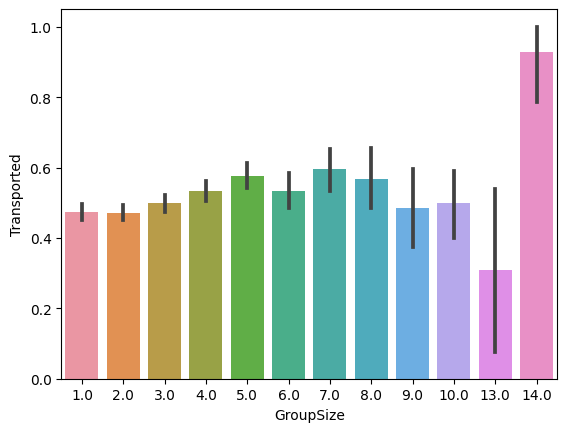

In [40]:
sns.barplot(x='GroupSize', y='Transported', data=train_df)

In [41]:
from scipy.stats import pearsonr

# Convertir booleanos a numéricos y calcular correlación
correlation, p_value = pearsonr(train_df["HasRelative"].astype(int), train_df["Transported"].astype(int))

print("Correlación de Pearson:", correlation)
print("Valor p:", p_value)

Correlación de Pearson: 0.030875483757367993
Valor p: 0.0039895482785694105


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist(df, feature, cts, bin_size):
    if cts == 1:
        # Continuous data
        bins = np.arange(0, df[feature].max() + bin_size, bin_size)
        df['bin'] = pd.cut(df[feature], bins=bins)
        p = df.groupby('bin').size().reset_index(name='num')
        p['bin'] = p['bin'].astype(str)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=p, x='bin', y='num', palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(f"{feature} bins")
        plt.ylabel("Value Count")
        plt.title(f"Passengers by {feature}")
        plt.show()
        
    else:
        # Categorical data
        p = df[feature].value_counts().reset_index()
        p.columns = ['var', 'num']
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=p, x='var', y='num', palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(f"{feature} bins")
        plt.ylabel("Value Count")
        plt.title(f"Passengers by {feature}")
        plt.show()

def plot_surv(df, feature, cts, bin_size):
    if cts == 1:
        # Continuous data
        bins = np.arange(0, df[feature].max() + bin_size, bin_size)
        df['bin'] = pd.cut(df[feature], bins=bins)
        
        grouped = df.groupby('bin').agg(
            num=('Transported', 'size'),
            n_Transported=('Transported', 'sum')
        )
        grouped['n_died'] = grouped['num'] - grouped['n_Transported']
        grouped['p_Transported'] = grouped['n_Transported'] / grouped['num']
        grouped['p_died'] = 1 - grouped['p_Transported']
        grouped.reset_index(inplace=True)

        # Plotting absolute values
        plt.figure(figsize=(10, 6))
        sns.barplot(data=grouped, x='bin', y='n_Transported', color='green', label='Survived')
        sns.barplot(data=grouped, x='bin', y='n_died', color='red', label='Died', alpha=0.7)
        plt.xticks(rotation=90)
        plt.xlabel(f"{feature} bins")
        plt.ylabel("Counts")
        plt.title(f"Number of survivors by {feature}")
        plt.legend()
        plt.show()

        # Plotting proportions
        grouped['bin'] = grouped['bin'].astype(str)
        melted = grouped.melt(id_vars='bin', value_vars=['p_Transported', 'p_died'], 
                              var_name='status', value_name='proportion')
        plt.figure(figsize=(10, 6))
        sns.barplot(data=melted, x='bin', y='proportion', hue='status', palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(f"{feature} bins")
        plt.ylabel("Proportion")
        plt.title(f"Proportion of survivors by {feature}")
        plt.show()

    else:
        # Categorical data
        grouped = df.groupby(feature).agg(
            num=('Survived', 'size'),
            n_Transported=('Survived', 'sum')
        )
        grouped['n_died'] = grouped['num'] - grouped['n_Transported']
        grouped['p_Transported'] = grouped['n_Transported'] / grouped['num']
        grouped['p_died'] = 1 - grouped['p_Transported']
        grouped.reset_index(inplace=True)

        # Plotting absolute values
        plt.figure(figsize=(10, 6))
        sns.barplot(data=grouped, x=feature, y='n_Transported', color='green', label='Survived')
        sns.barplot(data=grouped, x=feature, y='n_died', color='red', label='Died', alpha=0.7)
        plt.xticks(rotation=90)
        plt.xlabel(feature)
        plt.ylabel("Counts")
        plt.title(f"Number of survivors by {feature}")
        plt.legend()
        plt.show()

        # Plotting proportions
        melted = grouped.melt(id_vars=feature, value_vars=['p_Transported', 'p_died'], 
                              var_name='status', value_name='proportion')
        plt.figure(figsize=(10, 6))
        sns.barplot(data=melted, x=feature, y='proportion', hue='status', palette='viridis')
        plt.xticks(rotation=90)
        plt.xlabel(feature)
        plt.ylabel("Proportion")
        plt.title(f"Proportion of survivors by {feature}")
        plt.show()


In [43]:
# train_df.drop(columns=['Name', 'LastName', 'FirstName', 'bin', 'GroupSize'], inplace=True)
# test_df.drop(columns=['Name', 'LastName', 'FirstName', 'bin'], inplace=True)
# train_df['GroupSize'].fillna(0, inplace=True)
train_df.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
FirstName       200
LastName        200
Deck              0
Number            0
Side              0
GroupSize       200
HasRelative       0
dtype: int64

##  Custom Transdformers

In [44]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None, log=False):
        # Verifica si X es un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X must be a pandas DataFrame')
        return self

    def transform(self, X, y=None, log=True):
        # Verifica si X es un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X must be a pandas DataFrame')

        # Realiza una copia de X para evitar modificar el DataFrame original
        X = X.copy()
        
        # Compara correctamente si log es False
        if log == False:
            # Aplica el método _used_services
            self._used_services(X)
        else:
            # Aplica la transformación logarítmica a las columnas correspondientes
            self._log_transform(X)
        
        return X

    def _used_services(self, X):
        # Crea la columna 'UseServices' como la suma de los servicios utilizados
        X['UseServices'] = (X['Spa'] + X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['VRDeck'] > 0).astype(np.uint8)

        # Elimina las columnas originales de servicios
        X.drop(columns=['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck'], inplace=True)

    def _log_transform(self, X):
        # Aplica una transformación logarítmica (log1p) a las columnas de servicios
        X[['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']] = np.log1p(X[['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']])


        

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

custom_preproc = make_pipeline(
    CustomTransformer()    
)

train_set_copy = train_df.copy()
train_set_copy = train_set_copy.drop(["Transported"], axis=1)

train_custom_preproc = custom_preproc.fit_transform(train_set_copy)
train_custom_preproc.head()

train_df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,FirstName,LastName,Deck,Number,Side,GroupSize,HasRelative
0,0001_01,Europa,True,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,Maham,Ofracculy,B,3.0,P,1.0,False
1,0002_01,Earth,True,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,Juanna,Vines,F,4.0,S,3.0,True
2,0003_01,Europa,True,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,Altark,Susent,A,0.0,S,2.0,True
3,0003_02,Europa,True,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,Solam,Susent,A,1.0,S,2.0,True
4,0004_01,Earth,True,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,Willy,Santantines,F,5.0,S,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,True,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,A,B_P_4195,P,1.0,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,Kurta,Mondalley,G,B_P_3695,S,1.0,False
8690,9279_01,Earth,True,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,Fayey,Connon,G,B_P_9545,S,6.0,True
8691,9280_01,Europa,True,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,Celeon,Hontichre,E,B_P_3509,S,3.0,True


In [46]:
from sklearn.model_selection import train_test_split
train_df['GroupSize'].fillna(train_df['GroupSize'].mean(), inplace=True)
X = train_df.drop(columns=['Transported', 'Name', 'LastName', 'FirstName', 'PassengerId', 'Number', 'Cabin'])
X['TotalSpent'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa'] + X['VRDeck']
X.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
X = pd.get_dummies(X)
y = train_df['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

<ipython-input-46-29bba5591cbe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['GroupSize'].fillna(train_df['GroupSize'].mean(), inplace=True)


In [47]:
X

,CryoSleep,Age,VIP,GroupSize,HasRelative,TotalSpent,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,True,39.0,False,1.0,False,0.0,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,True,24.0,False,3.0,True,736.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,True,58.0,True,2.0,True,10383.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,True,33.0,False,2.0,True,5176.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
4,True,16.0,False,4.0,True,1091.0,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,True,41.0,True,1.0,False,8536.0,False,True,False,True,...,True,False,False,False,False,False,False,False,True,False
8689,True,18.0,False,1.0,False,0.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8690,True,26.0,False,6.0,True,1873.0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
8691,True,32.0,False,3.0,True,4637.0,False,True,False,True,...,False,False,False,False,True,False,False,False,False,True


## Modeling

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier

# # Set random seed
# np.random.seed(2)

# # Define models
# models = {
#     "DecisionTree": DecisionTreeClassifier(),
#     "RandomForest": RandomForestClassifier(),
#     "ExtraTrees": ExtraTreesClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "KNN": KNeighborsClassifier(),
#     "SVC": SVC(kernel='rbf', probability=True),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#     "GradientBoost": GradientBoostingClassifier(),
#     "NN": MLPClassifier()
# }

# # Initialize results storage
# results = []

# # Perform cross-validation
# k_folds = 10
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=2)

# for model_name, model in models.items():
#     try:
#         # Train and evaluate model using cross-validation
#         scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        
#         # Store accuracy and standard deviation
#         results.append({
#             "Model_Name": model_name,
#             "acc": np.mean(scores),
#             "std": np.std(scores)
#         })
#     except Exception as e:
#         print(f"Model {model_name} failed: {e}")

# # Convert results to DataFrame and display
# results_df = pd.DataFrame(results)
# print(results_df)



In [50]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Inicializar modelos
svc = SVC()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
gb = GradientBoostingClassifier()

In [51]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar modelos
svc = SVC()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
gb = GradientBoostingClassifier()

# Aplicar GridSearchCV
svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
xgb_grid = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
gb_grid = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')


In [52]:
# from tqdm import tqdm
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV

# # Inicializar modelos
# svc = SVC()
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# gb = GradientBoostingClassifier()

# # Aplicar GridSearchCV con barra de progreso
# def fit_with_progress(grid, X_train, y_train, desc):
#     param_combinations = list(grid.param_grid)
#     total_fits = len(param_combinations) * grid.cv
    
#     with tqdm(total=total_fits, desc=desc) as pbar:
#         def update_progress(*args, **kwargs):
#             pbar.update(1)
        
#         grid.fit(X_train, y_train)
#     return grid

# svc_grid = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
# xgb_grid = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
# gb_grid = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')

# svc_grid = fit_with_progress(svc_grid, X_train, y_train, "Optimización de SVC")
# xgb_grid = fit_with_progress(xgb_grid, X_train, y_train, "Optimización de XGBoost")
# gb_grid = fit_with_progress(gb_grid, X_train, y_train, "Optimización de Gradient Boosting")

# # Mostrar mejores hiperparámetros
# print("Mejores hiperparámetros para SVC:", svc_grid.best_params_)
# print("Mejores hiperparámetros para XGBoost:", xgb_grid.best_params_)
# print("Mejores hiperparámetros para Gradient Boosting:", gb_grid.best_params_)


In [53]:
stacking_model = StackingClassifier(
    estimators=[('svc', svc), ('xgb', xgb), ('gb',gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

In [54]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
blended_preds = cross_val_predict(stacking_model, X_train, y_train, cv=kf)
ensemble_accuracy = accuracy_score(y_train, blended_preds)
print(f'Stacking Model Accuracy: {ensemble_accuracy:.4f}')

Stacking Model Accuracy: 0.7446


In [55]:
X = train_df.drop(columns=['Transported', 'Name', 'LastName', 'FirstName', 'PassengerId'])
X = pd.get_dummies(X)
y = train_df['Transported']

stacking_model.fit(X, y)



StackingClassifier(cv=5,
                   estimators=[('svc', SVC()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_c...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [56]:
X = test_df.drop(columns=['PassengerId', 'Name', 'FirstName', 'LastName'])
X = pd.get_dummies(X)
test_df['Transported'] = stacking_model.predict(X)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Number_A_P_1777
- Number_A_P_4017
- Number_A_P_5408
- Number_A_P_5869
- Number_A_P_6164
- ...
Feature names seen at fit time, yet now missing:
- Cabin_A/0/P
- Cabin_A/0/S
- Cabin_A/1/S
- Cabin_A/10/P
- Cabin_A/10/S
- ...


In [ ]:
submission = test_df[['PassengerID', 'Transported']]
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv('submission.csv', index=False)

print('Submission file created succesfully')

In [ ]:
X_train